# Plot progeny composition

- We trained an SVM with the morphological descriptors of all the founders
- With it, we labeled all progeny based on their grain morphology
- We visualize how the progeny is distributed according to shape

In [1]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(viridis))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(reshape2))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggpattern))

In [4]:
setwd('~/documents/barley_stacks/preproc/progeny/unsupervised')
founders <- read.csv('../../../corrected_metadata.csv')
#founders_names_original <- sort(unique(founders$Founder))[-1]
founders_names_original <- levels(unique(founders$Founder))[-1]
founders_names <- founders_names_original
founders_names[5] <- 'CA Mariout'
founders_names[11] <- 'Good Delta'
founders_names[17] <- 'Maison Carree'
founders_names[24] <- 'Palmella Blue'
founders_names[28] <- 'WI Winter'
print(founders_names)

 [1] "Algerian"        "Alpha"           "Arequipa"        "Atlas"          
 [5] "CA Mariout"      "Club Mariout"    "Everest"         "Flynn"          
 [9] "Glabron"         "Golden Pheasant" "Good Delta"      "Han River"      
[13] "Hannchen"        "Horn"            "Lion"            "Lyallpur"       
[17] "Maison Carree"   "Manchuria"       "Meloy"           "Minia"          
[21] "Multan"          "Oderbrucker"     "Orel"            "Palmella Blue"  
[25] "Sandrel"         "Trebi"           "White Smyrna"    "WI Winter"      


In [5]:
# Bang Wong
colors_wong <- c('#000000','#E69F00','#52ADE0','#009E73',
                 '#F0E442','#0072B2','#D55E00','#CC79A7')

In [56]:
# Paul Tol
colors_tol <- c('#332288', '#117733', '#44AA99', '#88CCEE',
                '#DDCC77', '#CC6677', '#AA4499', '#882255')
colors_bright <- c('#4477AA', '#66CCEE', '#228833','#707070',
                   '#CCBB44', '#EE6677', '#AA3377')
#colors_high <- c('#F0E442', '#0005FF', '#D50000', '#FFFFFF')
colors_high <- c('#F0E442', '#0072B2','#D55E00', '#FFFFFF')
colors_high <- c('#66CCEE', '#CCBB44','#AA3377', '#444444')

In [66]:
# gen7_svm_combined_d158_T16_toposcaled.csv
gen <- 7
genn <- 58
d <- 158
TT <- 16

info_type <- 'combined'
scaled <- 'topounscaled'

filename <- paste('gen', gen, '_svm_', info_type, '_d', d,'_T',TT,'_',scaled,'.csv', sep='')
progeny <- read.csv(filename)

In [67]:
counts <- matrix(0, ncol=3, nrow=length(founders_names))
rownames(counts) <- founders_names_original

for(i in 1:length(founders_names_original))
    counts[i,1] = sum(progeny$Founder == founders_names_original[i])

counts[,2] <- (counts[,1]/dim(progeny)[1]*100)
ordered <- counts[base::order(counts[,1], decreasing=TRUE),]
ordered[,3] <- base::cumsum(ordered[,2])
rownames(ordered) <- founders_names[rank(rownames(ordered))]
df <- as.data.frame(ordered)
df$Line <- rownames(df)
df$Line <- factor(df$Line, levels=founders_names)
#df
#genotypes <- df[df$V2 > 1,'Line']
genotypes <- rev(levels(reorder(df$Line, df$V2)))

In [68]:
pattrn <- rep(c('stripe', 'crosshatch', 'circle'), length.out=nrow(df))
fcolors <- rep(colors_bright, length.out=nrow(df))
pfcolors <- colors_wong[c(5:8,1:4,8:5,4:1,6,5,8,7,2,1,4,3,7,8,5,6,6,3,4,1,2)]
pccolors <- colors_wong[c(8:5,4:1,6,5,8,7,2,1,4,3,7,8,5,6,6,3,4,1,2,5:8,1:4)]

pfcolors <- rep(colors_high, length.out=nrow(df))
pccolors <- rep(rev(colors_high), length.out=nrow(df))

pangle <- rep(c(-55,5,55), length.out=nrow(df))
pangle[seq(2,nrow(df), by=3)] <- seq(-7, 9, by=2)
fcolors
pfcolors
pangle

[1] "#4477AA" "#66CCEE" "#228833" "#707070" "#CCBB44" "#EE6677" "#AA3377"
 [8] "#4477AA" "#66CCEE" "#228833" "#707070" "#CCBB44" "#EE6677" "#AA3377"
[15] "#4477AA" "#66CCEE" "#228833" "#707070" "#CCBB44" "#EE6677" "#AA3377"
[22] "#4477AA" "#66CCEE" "#228833" "#707070" "#CCBB44" "#EE6677" "#AA3377"

[1] "#66CCEE" "#CCBB44" "#AA3377" "#444444" "#66CCEE" "#CCBB44" "#AA3377"
 [8] "#444444" "#66CCEE" "#CCBB44" "#AA3377" "#444444" "#66CCEE" "#CCBB44"
[15] "#AA3377" "#444444" "#66CCEE" "#CCBB44" "#AA3377" "#444444" "#66CCEE"
[22] "#CCBB44" "#AA3377" "#444444" "#66CCEE" "#CCBB44" "#AA3377" "#444444"

[1] -55  -7  55 -55  -5  55 -55  -3  55 -55  -1  55 -55   1  55 -55   3  55 -55
[20]   5  55 -55   7  55 -55   9  55 -55

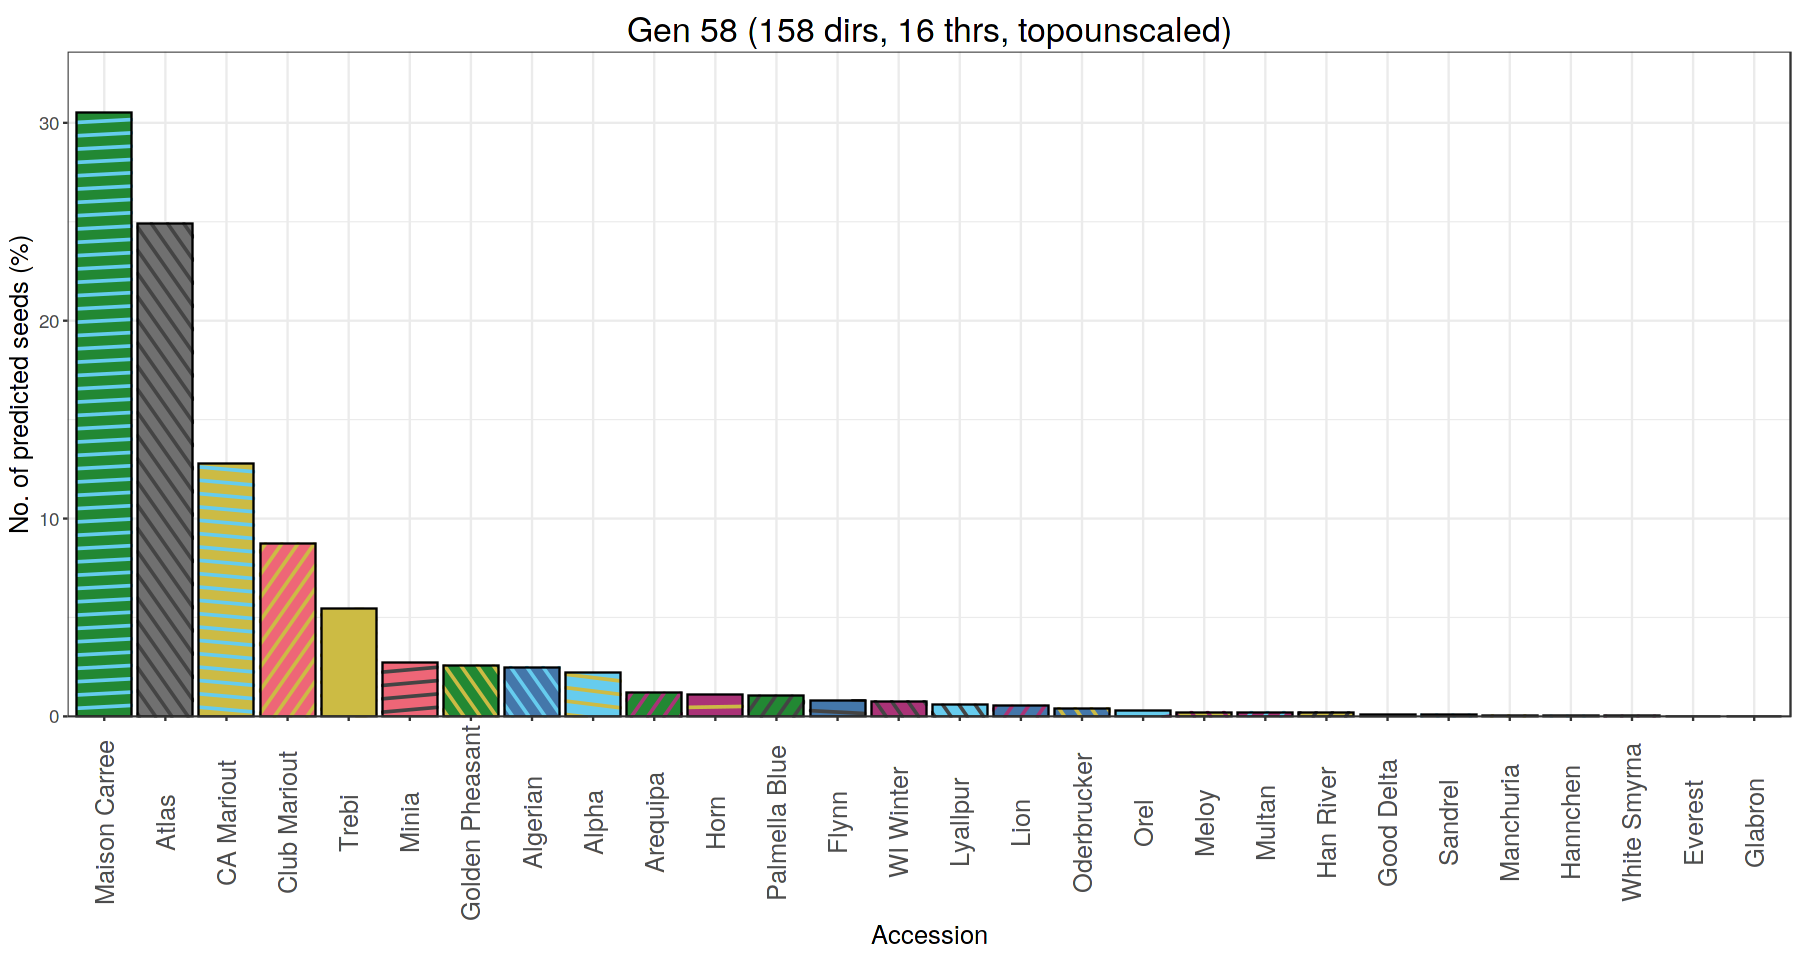

In [69]:
options(repr.plot.width=15, repr.plot.height=8)

titlename <- paste('Gen ', genn, ' (', d,' dirs, ', TT, ' thrs, ', scaled,')', sep='')

p <- ggplot2::ggplot(df, aes(x=stats::reorder(Line, -V2), y=V2)) + 
     geom_col_pattern(aes(fill=Line, pattern_fill=Line, 
                          pattern_angle=Line, pattern_colour=Line), 
                      pattern = 'stripe',
                      color='black',
                      pattern_density=0.1,
                      pattern_spacing = 0.02,
                      pattern_size = 0.5) +
     scale_fill_manual(values = fcolors) +
     scale_pattern_fill_manual(values = pfcolors) +
     #scale_pattern_manual(values = pattrn) +
     scale_pattern_angle_manual(values = pangle) +
     scale_pattern_colour_manual(values = pfcolors) +
     theme_bw() +
     scale_y_continuous(expand = expansion(mult = c(0, .1))) +
     theme(plot.title = element_text(hjust = 0.5, vjust = 0, size=20),
            axis.text.x = element_text(size = 15, hjust = 0.5, vjust=0.5, angle=90),
            axis.text.y = element_text(size = 11),
            axis.title = element_text(size=15),
            legend.position = 'none') +
      ylab('No. of predicted seeds (%)') +
      ggtitle(titlename) +
      xlab('Accession')
p

In [70]:
w <- 8
h <- 9

filename <- paste('histogram_umap_gen',gen,'_d',d,'_T',TT,'_',scaled,'_vert',sep='')
ggplot2::ggsave(paste(filename, '.pdf', sep=''), plot=p, device='pdf', width=w, height=h)
#ggplot2::ggsave(paste(filename, '.png', sep=''), plot=p, device='png', width=8, height=9)

In [71]:
w <- 12
h <- 6

filename <- paste('histogram_umap_gen',gen,'_d',d,'_T',TT,'_',scaled,'_horz',sep='')
ggplot2::ggsave(paste(filename, '.pdf', sep=''), plot=p, device='pdf', width=w, height=h)
#ggplot2::ggsave(paste(filename, '.png', sep=''), plot=p, device='png', width=w, height=h)

## Individual lines

In [72]:
selection <- sort(unique(progeny$Selection))
counts <- matrix(0, nrow=length(selection), ncol=length(founders_names))

for(i in 1:nrow(counts)){
    foo <- progeny[progeny$Selection == selection[i], ]
    for(j in 1:ncol(counts)){
        counts[i,j] <- (sum(foo$Founder == founders_names_original[j])/nrow(foo)*100)
    }
}

dg <- as.data.frame(counts)
colnames(dg) <- founders_names
rownames(dg) <- selection
dg$Selection <- rownames(dg)

In [73]:
dga <- dplyr::arrange(dg, dplyr::desc(data.frame(base::rowSums(dg[genotypes[1:4]]))))
dga$Selection <- factor(dga$Selection, levels=dga$Selection[1:nrow(dga)])
dga <- dplyr::select(dga, c(colnames(dga)[rank(genotypes)], 'Selection'))

In [74]:
dgm <- reshape2::melt(dga, id.vars='Selection', variable.name='Line', value.name='Percentage')

In [75]:
options(repr.plot.width=20, repr.plot.height=10)

titlename <- paste('SVM Results for Gen ', genn, ' (',d,' directions, ', TT, ' thresholds)', sep='')
ttitlename <- paste('-          ', titlename, '            -')

p <- ggplot(dgm, aes(x=Selection, y=Percentage)) +
     #geom_col(aes(fill=Line), position = position_stack(reverse = TRUE))+
     geom_col_pattern(aes(fill=Line, pattern_fill=Line, 
                          pattern_angle=Line, pattern_colour=Line), 
                      color='black',
                      pattern = 'stripe',
                      pattern_spacing = 0.02,
                      pattern_density = 0.1,
                      pattern_size = 0.5,
                      pattern_key_scale_factor = 0.4,
                      position = position_stack(reverse = TRUE)) +
     scale_fill_manual(values = fcolors[rank(genotypes)], guide = guide_legend(ncol = 9)) +
     scale_pattern_fill_manual(values = pfcolors[rank(genotypes)]) +
     #scale_pattern_manual(values = pattrn[rank(genotypes)]) +
     scale_pattern_angle_manual(values = pangle[rank(genotypes)]) +
     scale_pattern_colour_manual(values = pfcolors[rank(genotypes)]) +
     theme_bw() +
     scale_y_continuous(expand = expansion(mult = c(0, .1))) +
     theme(plot.title = element_text(hjust = 0.5, vjust = 0, size=20),
            axis.text.x = element_text(size = 11, angle=90),
            #axis.text.x = element_blank(),
            axis.text.y = element_text(size = 11),
            axis.title = element_text(size=15),
            legend.text = element_text(size=11),
            legend.position = "top",
            legend.key.size = unit(0.6, 'cm')
            ) +
      ylab('No. of predicted seeds (%)') +
      ggtitle(titlename) +
      xlab('Selection') 
      #guides(col = guide_legend(ncol = 8))
#p

In [76]:
w = 14
h = 8
filename <- paste('selection_umap_gen',gen,'_d',d,'_T',TT,sep='')
ggplot2::ggsave(paste(filename, '.pdf', sep=''), plot=p, device='pdf', width=w, height=h)
#ggplot2::ggsave(paste(filename, '.png', sep=''), plot=p, device='png', width=w, height=h)